### Extracting Flows from Frames

In [ ]:
# # References From:
# # https://towardsdatascience.com/generating-optical-flow-using-nvidia-flownet2-pytorch-implementation-d7b0ae6f8320
# # https://github.com/NVIDIA/flownet2-pytorch
# # https://github.com/LiUzHiAn/hf2vad/tree/master/pre_process
# # https://github.com/talreiss/Accurate-Interpretable-VAD ---> https://arxiv.org/pdf/2212.00789.pdf

#### Getting Flownet Dependencies

In [ ]:
# # CELL 1
# # Borrowed from https://github.com/NVIDIA/flownet2-pytorch
# get flownet2_pytorch source
!gdown --folder https://drive.google.com/drive/folders/1aF9p48sn_Pqtn-Lxjk0PQ-N82VrdV3S3

Retrieving folder list
Processing file 1-1GcoUjLSGHd6tnPcGNPezFlhVh80aq1 __init__.py
Retrieving folder 12KG6HvKJP_m5HSW0UFmv3yzp2g8n55Oq __pycache__
Processing file 12_XJCM9evDUS8avjCucvk2wBg1vde4zI __init__.cpython-310.pyc
Processing file 11oHW_f9XQitkpzjxhK1mgCRZu9Z4dUNh datasets.cpython-310.pyc
Processing file 12Txw8wHTBIa_reCBBeJ9B6FYcab58t7e models.cpython-310.pyc
Retrieving folder 1-1BbzZ4XNra_BK-wY179ZOqWyPv0_85j .git
Retrieving folder 1-uoU7mF7UogFHUXoCkin3GVoMupR_PKb branches
Processing file 1-nYubbUXTUpscviCl4C-78khOt9_Mxlg config
Processing file 1-yNAyFNiQfOG2EyVS15q6KeaL36tmm-H description
Processing file 1-O14GusRRWmbd_nn4W6E-zldPMnwibti HEAD
Retrieving folder 1-sFLbJ19SxVFZucJNh7EUSlXp53F3zyG hooks
Processing file 11Sp2auJ-N7Ma_jK9KYKIRSas62KLVNrX applypatch-msg.sample
Processing file 1195ZU7xRHPSF3nH6pnNGTQP0aw801GdZ commit-msg.sample
Processing file 11sazXXamuFLrKAsUa999VVT-n4vWBOm1 fsmonitor-watchman.sample
Processing file 123e1Kcd5iH8seZZuHwtZLd80z3g0bV0c post-update.

In [ ]:
# # CELL 2
# install custom layers
%cd flownet2_pytorch
!bash install.sh
%cd ..

/content/flownet2_pytorch
running install
/usr/lib/python3.10/distutils/cmd.py:62: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/lib/python3.10/distutils/cmd.py:62: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/

In [ ]:
# # CELL 3
# get pretrained weights
!gdown 1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1hF8vS6YeHkx3j2pfCeQqqZGwA_PJq_Da 



#### Getting & Unzipping the Dataset

In [ ]:
# # CELL 4
# Get Dataset
!wget http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
!tar -xzvf UCSD_Anomaly_Dataset.tar.gz
!rm UCSD_Anomaly_Dataset.tar.gz

Streaming output truncated to the last 5000 lines.
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/139.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/002.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/060.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/085.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/067.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/127.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/131.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/012.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/148.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/144.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/015.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/009.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/102.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/143.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/078.bmp
UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test003_gt/017.bmp
UCSD_

#### Getting & Unzipping the Code Modules

In [ ]:
# # CELL 5
# Module files
!gdown --folder https://drive.google.com/drive/u/0/folders/1_Nb4W8vIter7YZITFPG8luVgVm6ifj7n
%cd Att_Based_Dependencies/
!mv * ../
%cd ..
!rm -r Att_Based_Dependencies
!unzip att_based_model_files.zip
!rm att_based_model_files.zip

Retrieving folder list
Processing file 1cB664K7RMPOhfepzcHprdaHuaYODTrP5 att_based_model_files.zip
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1cB664K7RMPOhfepzcHprdaHuaYODTrP5
To: /content/Att_Based_Dependencies/att_based_model_files.zip
100% 4.87k/4.87k [00:00<00:00, 14.5MB/s]
Download completed
/content/Att_Based_Dependencies
/content
Archive:  att_based_model_files.zip
  inflating: test.py                 
  inflating: video_dataset.py        


#### Execution

In [ ]:
# # CELL 6
!python flow_extraction_ped2.py
# # ModuleNotFoundError: No module named 'flownet2_pytorch.networks.resample2d_package' then run Cells 1 & 2 again, cell 2 should take 4-5 minutes

  0% 5/2550 [00:02<23:20,  1.82it/s]
Traceback (most recent call last):
  File "/content/test.py", line 59, in <module>
    pred_flow = flownet2(ims).cpu().data
KeyboardInterrupt
^C


### Extracting Bounded Boxes from Frames

#### Getting Data

In [ ]:
!wget http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
!tar -xzf UCSD_Anomaly_Dataset.tar.gz
!rm -rf Train
!rm -rf Test
!mkdir Train
!mkdir Test
!mv UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train .
!mv UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test .
!rm -rf UCSD_Anomaly_Dataset.v1p2

--2023-05-03 03:54:47--  http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
Resolving www.svcl.ucsd.edu (www.svcl.ucsd.edu)... 169.228.63.130
Connecting to www.svcl.ucsd.edu (www.svcl.ucsd.edu)|169.228.63.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740306953 (706M) [application/x-gzip]
Saving to: ‘UCSD_Anomaly_Dataset.tar.gz’

UCSD_Anomaly_Datase 100%[===================>] 706.01M  42.8MB/s    in 20s     

2023-05-03 03:55:08 (34.6 MB/s) - ‘UCSD_Anomaly_Dataset.tar.gz’ saved [740306953/740306953]



#### Converting Frames to Video for faster processing and better results

In [ ]:
from PIL import Image
import numpy as np
import os

def load_label_dict():
  arr = []
  with open('Test/UCSDped2.m') as f:
    for line in f:
      if 'gt_frame' in line:
        rng = line.split('[')[1][:-3]
        arr.append([int(s) for s in rng.split(':')])
  d = {i: arr[i] for i in range(12)}
  return d

def load_frame(path):
  im = Image.open(path)
  return np.array(im)

def load_video_and_labels(test=False):
  root_dir = 'Test' if test else 'Train'
  d = load_label_dict()
  video_folders = [f for f in os.listdir(root_dir) if root_dir in f and 'gt' not in f]
  video_folders.sort()
  all_data = []
  for index, video_folder in enumerate(video_folders):
    frames = [f for f in os.listdir(root_dir + '/' + video_folder) if 'tif' in f]
    all_frame_matrices = [load_frame(root_dir + '/' + video_folder + '/' + frame) for frame in frames]
    num_frames = len(frames)
    if test:
      min_index, max_index = d[index]
      y_true = np.concatenate((np.zeros(min_index - 1), np.ones(max_index - min_index + 1), np.zeros(num_frames - max_index)))
      all_data.append((np.array(all_frame_matrices), y_true))
    else:
      all_data.append(np.array(all_frame_matrices))
  return all_data
result = load_video_and_labels(test=True)

In [ ]:
test_videos = load_video_and_labels(test=True)
train_videos = load_video_and_labels(test=False)
test_videos[0][0].shape, test_videos[0][1].shape, train_videos[0].shape

((180, 240, 360), (180,), (120, 240, 360))

In [ ]:
import os
import moviepy.video.io.ImageSequenceClip
import cv2, os

!mkdir videos

def images_to_mp4(path, vid_name):
  image_files = [os.path.join(path,img) for img in os.listdir(path) if img.endswith(".tif")]
  jpeg_files = []
  for f in image_files:
    read = cv2.imread(f)
    outfile = f.split('.')[0] + '.jpg'
    jpeg_files.append(outfile)
    cv2.imwrite(outfile, read ,[int(cv2.IMWRITE_JPEG_QUALITY), 200])
  jpeg_files.sort()
  clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(jpeg_files, fps=10)
  clip.write_videofile(vid_name + '.mp4')

for i in range(12):
  images_to_mp4('Test/Test' + ('00' + str(i + 1) if i + 1 < 10 else '0' + str(i + 1)), 'videos/Test' + str(i + 1))

for i in range(16):
  images_to_mp4('Train/Train' + ('00' + str(i + 1) if i + 1 < 10 else '0' + str(i + 1)), 'videos/Train' + str(i + 1))

Moviepy - Building video videos/Test1.mp4.
Moviepy - Writing video videos/Test1.mp4



Moviepy - Done !
Moviepy - video ready videos/Test1.mp4
Moviepy - Building video videos/Test2.mp4.
Moviepy - Writing video videos/Test2.mp4



Moviepy - Done !
Moviepy - video ready videos/Test2.mp4
Moviepy - Building video videos/Test3.mp4.
Moviepy - Writing video videos/Test3.mp4



Moviepy - Done !
Moviepy - video ready videos/Test3.mp4
Moviepy - Building video videos/Test4.mp4.
Moviepy - Writing video videos/Test4.mp4



Moviepy - Done !
Moviepy - video ready videos/Test4.mp4
Moviepy - Building video videos/Test5.mp4.
Moviepy - Writing video videos/Test5.mp4



Moviepy - Done !
Moviepy - video ready videos/Test5.mp4
Moviepy - Building video videos/Test6.mp4.
Moviepy - Writing video videos/Test6.mp4



Moviepy - Done !
Moviepy - video ready videos/Test6.mp4
Moviepy - Building video videos/Test7.mp4.
Moviepy - Writing video videos/Test7.mp4



Moviepy - Done !
Moviepy - video ready videos/Test7.mp4
Moviepy - Building video videos/Test8.mp4.
Moviepy - Writing video videos/Test8.mp4



Moviepy - Done !
Moviepy - video ready videos/Test8.mp4
Moviepy - Building video videos/Test9.mp4.
Moviepy - Writing video videos/Test9.mp4



Moviepy - Done !
Moviepy - video ready videos/Test9.mp4
Moviepy - Building video videos/Test10.mp4.
Moviepy - Writing video videos/Test10.mp4



Moviepy - Done !
Moviepy - video ready videos/Test10.mp4
Moviepy - Building video videos/Test11.mp4.
Moviepy - Writing video videos/Test11.mp4



Moviepy - Done !
Moviepy - video ready videos/Test11.mp4
Moviepy - Building video videos/Test12.mp4.
Moviepy - Writing video videos/Test12.mp4



Moviepy - Done !
Moviepy - video ready videos/Test12.mp4
Moviepy - Building video videos/Train1.mp4.
Moviepy - Writing video videos/Train1.mp4



Moviepy - Done !
Moviepy - video ready videos/Train1.mp4
Moviepy - Building video videos/Train2.mp4.
Moviepy - Writing video videos/Train2.mp4



Moviepy - Done !
Moviepy - video ready videos/Train2.mp4
Moviepy - Building video videos/Train3.mp4.
Moviepy - Writing video videos/Train3.mp4



Moviepy - Done !
Moviepy - video ready videos/Train3.mp4
Moviepy - Building video videos/Train4.mp4.
Moviepy - Writing video videos/Train4.mp4



Moviepy - Done !
Moviepy - video ready videos/Train4.mp4
Moviepy - Building video videos/Train5.mp4.
Moviepy - Writing video videos/Train5.mp4



Moviepy - Done !
Moviepy - video ready videos/Train5.mp4
Moviepy - Building video videos/Train6.mp4.
Moviepy - Writing video videos/Train6.mp4



Moviepy - Done !
Moviepy - video ready videos/Train6.mp4
Moviepy - Building video videos/Train7.mp4.
Moviepy - Writing video videos/Train7.mp4



Moviepy - Done !
Moviepy - video ready videos/Train7.mp4
Moviepy - Building video videos/Train8.mp4.
Moviepy - Writing video videos/Train8.mp4



Moviepy - Done !
Moviepy - video ready videos/Train8.mp4
Moviepy - Building video videos/Train9.mp4.
Moviepy - Writing video videos/Train9.mp4



Moviepy - Done !
Moviepy - video ready videos/Train9.mp4
Moviepy - Building video videos/Train10.mp4.
Moviepy - Writing video videos/Train10.mp4



Moviepy - Done !
Moviepy - video ready videos/Train10.mp4
Moviepy - Building video videos/Train11.mp4.
Moviepy - Writing video videos/Train11.mp4



Moviepy - Done !
Moviepy - video ready videos/Train11.mp4
Moviepy - Building video videos/Train12.mp4.
Moviepy - Writing video videos/Train12.mp4



Moviepy - Done !
Moviepy - video ready videos/Train12.mp4
Moviepy - Building video videos/Train13.mp4.
Moviepy - Writing video videos/Train13.mp4



Moviepy - Done !
Moviepy - video ready videos/Train13.mp4
Moviepy - Building video videos/Train14.mp4.
Moviepy - Writing video videos/Train14.mp4



Moviepy - Done !
Moviepy - video ready videos/Train14.mp4
Moviepy - Building video videos/Train15.mp4.
Moviepy - Writing video videos/Train15.mp4



Moviepy - Done !
Moviepy - video ready videos/Train15.mp4
Moviepy - Building video videos/Train16.mp4.
Moviepy - Writing video videos/Train16.mp4



Moviepy - Done !
Moviepy - video ready videos/Train16.mp4


#### Getting Bounding Boxes

In [ ]:
!pip install ultralytics &> /dev/null

In [ ]:
from ultralytics import YOLO

bounding_box_model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 54.2MB/s]


In [ ]:
is_test = False
train_xyxy = []
for ij in range(16):
  video_index = ij + 1 
  result = list(bounding_box_model('videos/' + ('Test' if is_test else 'Train') + str(video_index) + '.mp4', verbose=False, stream=True))
  num_frames = len(result)
  for i in range(num_frames):
    train_xyxy.append(result[i].boxes.xyxy.numpy()[np.argwhere(result[i].boxes.conf.numpy() >= 0.26)].squeeze())
  print(video_index, np.array(train_xyxy).shape)
train_xyxy = np.array(train_xyxy)

<ipython-input-7-4473ed519554>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(video_index, np.array(train_xyxy).shape)


1 (120,)
2 (270,)
3 (420,)
4 (600,)
5 (780,)
6 (930,)
7 (1080,)
8 (1200,)
9 (1380,)
10 (1560,)
11 (1740,)
12 (1920,)
13 (2100,)
14 (2250,)
15 (2400,)
16 (2550,)


<ipython-input-7-4473ed519554>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_xyxy = np.array(train_xyxy)


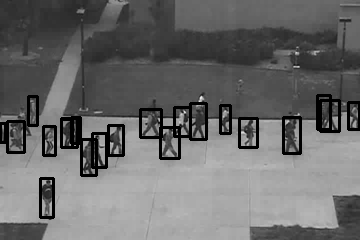

In [ ]:
from google.colab.patches import cv2_imshow
path ='Train/Train001/001.tif'
boxes = train_xyxy[0]

# Load the original image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

for box in boxes:
    x1, y1, x2, y2 = box[:4]  # Unpack the first four values only
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
is_test = True
test_xyxy = []
for ij in range(12):
  video_index = ij + 1 
  result = list(bounding_box_model('videos/' + ('Test' if is_test else 'Train') + str(video_index) + '.mp4', verbose=False, stream=True))
  num_frames = len(result)
  for i in range(num_frames):
    test_xyxy.append(result[i].boxes.xyxy.numpy()[np.argwhere(result[i].boxes.conf.numpy() >= 0.26)].squeeze())
  print(video_index, np.array(test_xyxy).shape)
test_xyxy = np.array(test_xyxy)

<ipython-input-8-623bf5392e24>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(video_index, np.array(test_xyxy).shape)


1 (180,)
2 (360,)
3 (510,)
4 (690,)
5 (840,)
6 (1020,)
7 (1200,)
8 (1380,)
9 (1500,)
10 (1650,)
11 (1830,)
12 (2010,)


FileNotFoundError: ignored

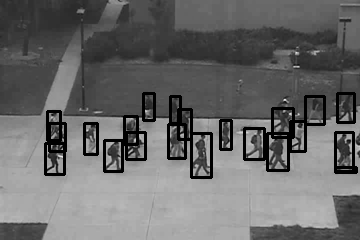

In [ ]:
from google.colab.patches import cv2_imshow
path ='Test/Test001/001.tif'
boxes = test_xyxy[0]

# Load the original image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

for box in boxes:
    x1, y1, x2, y2 = box[:4]  # Unpack the first four values only
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Velocity Calculation

In [ ]:
# Need to figure out how to give the base files for the code here...
import numpy as np
from video_dataset import VideoDatasetWithFlows
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from scipy.ndimage import gaussian_filter1d
from sklearn.mixture import GaussianMixture
import sys
from sklearn.mixture import GaussianMixture

def gaussian_video(video, lengths, sigma=3):
    scores = np.zeros_like(video)
    prev = 0
    for cur in lengths:
        scores[prev: cur] = gaussian_filter1d(video[prev: cur], sigma)
        prev = cur
    return scores

def macro_auc(video, test_labels, lengths):
    prev = 0
    auc = 0
    for i, cur in enumerate(lengths):
        cur_auc = roc_auc_score(np.concatenate(([0], test_labels[prev: cur], [1])),
                             np.concatenate(([0], video[prev: cur], [sys.float_info.max])))
        auc += cur_auc
        prev = cur
    return auc / len(lengths)


def evaluate(root):

    train_velocity = np.load(root + '/train_ucsd_velocity.npy', allow_pickle=True)
    train_velocity = np.concatenate(train_velocity, 0)

    test_velocity = np.load(root + '/test_ucsd_velocity.npy', allow_pickle=True)
    test_clip_lengths = np.load(root + '/UCSD_Anomaly_Dataset.v1p2/UCSDped2/test_clip_lengths.npy', allow_pickle= True)

    test_dataset = VideoDatasetWithFlows(dataset_name='ped2', root=root+ "/UCSD_Anomaly_Dataset.v1p2/UCSDped2/",
                                         train=False, sequence_length=0, all_bboxes=None, normalize=False, mode='last')
    velocity_density_estimator = GaussianMixture(n_components=2, random_state=0).fit(train_velocity)
    
    train_velocity_scores = -velocity_density_estimator.score_samples(train_velocity)

    min_velocity = np.min(train_velocity_scores)
    max_velocity = np.percentile(train_velocity_scores, 99.9)

    test_velocity_scores = []
    
    for i in tqdm(range(len(test_dataset)), total=len(test_dataset)):
        cur_velocity = test_velocity[i]

        max_score_velocity = np.max(-velocity_density_estimator.score_samples(cur_velocity))
        test_velocity_scores.append(max_score_velocity)

    test_velocity_scores = np.array(test_velocity_scores)

    test_velocity_scores = (test_velocity_scores - min_velocity) / (max_velocity - min_velocity)

    final_scores = gaussian_video(test_velocity_scores, test_clip_lengths, sigma=3)

    print('Micro AUC: ', roc_auc_score(test_dataset.all_gt, final_scores) * 100)
    print('Macro AUC: ', macro_auc(final_scores, test_dataset.all_gt, test_clip_lengths) * 100)

evaluate(os.getcwd())

# Evaluation

In [ ]:
# import numpy as np
# import sys

# def macro_auc(video_scores, test_labels, lengths):
#     prev = 0
#     macro_auc = 0
#     for i, cur in enumerate(lengths):
#         # Concatenate the predicted scores and ground truth labels with fake endpoints
#         y_true = np.concatenate(([0], test_labels[prev:cur], [1]))
#         y_scores = np.concatenate(([0], video_scores[prev:cur], [sys.float_info.max]))
        
#         # Sort the scores and corresponding labels in descending order
#         idx = np.argsort(y_scores)[::-1]
#         y_scores = y_scores[idx]
#         y_true = y_true[idx]
        
#         # Compute the true positive rate (TPR) and false positive rate (FPR) for various thresholds
#         num_normal = np.sum(y_true == 0)
#         num_anomaly = np.sum(y_true == 1)
#         tpr = np.zeros(num_anomaly + 1)
#         fpr = np.zeros(num_anomaly + 1)
#         tpr[0] = 0.0
#         fpr[0] = 0.0
#         for j in range(num_anomaly):
#             tpr[j + 1] = tpr[j] + 1.0 / num_anomaly
#             fpr[j + 1] = fpr[j]
#         for j in range(num_anomaly, num_anomaly + num_normal):
#             tpr[j + 1] = tpr[j]
#             fpr[j + 1] = fpr[j] + 1.0 / num_normal
        
#         # Compute the AUC score by numerical integration using the trapezoidal rule
#         auc_score = np.trapz(tpr, fpr)
#         macro_auc += auc_score
        
#         prev = cur
    
#     macro_auc /= len(lengths)
#     return macro_auc


# End